# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Chapter 10 - Mini-Project - Clustering Households by Energy Consumption</font>


Using a dataset containing information on household energy consumption, your challenge is to cluster customers by similarity in order to compreehend customer behavior and its relationship to energy usage.

You must execute the following tasks:

1- Treat the missing values on the dataset.

2- Collect a sample with 1% of the data to create a clustering model with K-Means

3- Reduce the dimensionality down to two features.

4- Find the optimal k value for this dataset.

5- Create the K-Means model using the k value found on item 3.

6- Create a Meshgrid to visualize all clusters.

7- Visualize the centroids.

8- Calculate the Silhouette Score.

9- Calculate the mean energy consumption per cluster (use the Global_active_power column)

Hint: For item 9, consider the sample created on item 2.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [2]:
# Loading data
dataset = pd.read_csv('household_power_consumption.txt', delimiter = ';', low_memory = False)

In [3]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
dataset.shape

(2075259, 9)

In [5]:
dataset.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [6]:
# Checking for missing values
dataset.isnull().values.any()

True

In [7]:
# Removing the first two columns (Date and Time), as they won't be used
# Removing rows with NA values
dataset = dataset.iloc[0:, 2:9].dropna()

In [8]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
# Checking for missing values
dataset.isnull().values.any()

False

In [10]:
# Extracting attribute values
dataset_attrib = dataset.values

In [11]:
dataset_attrib

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.938', '0.000', '239.820', ..., '0.000', '0.000', 0.0],
       ['0.934', '0.000', '239.700', ..., '0.000', '0.000', 0.0],
       ['0.932', '0.000', '239.550', ..., '0.000', '0.000', 0.0]],
      dtype=object)

In [12]:
# Sampling 1% of the dataset
sample1, sample2 = train_test_split(dataset_attrib, train_size = .01)

In [13]:
sample1.shape

(20492, 7)

In [14]:
# Applying dimensionality reduction
pca = PCA(n_components = 2).fit_transform(sample1)

In [15]:
# Defining a range o k values to test
k_range = range(1,12)

In [16]:
# Creating a K-Means model for each value of k
# This cell can take a long time to run
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [17]:
# Taking the cluster centroids of each model
centroids = [X.cluster_centers_ for X in k_means_var]

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

In [18]:
# Calculating the euclidean distance between each datapoint and the centroid
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [19]:
# Sum of squares of the intra cluster distances
sum_squares_intra_cluster = [sum(d**2) for d in dist]

In [20]:
# Total sum of squares
# Running this cell might give the CPU a hiccup!
sum_total = sum(pdist(pca)**2)/pca.shape[0]

In [21]:
# Inter-cluster sum of squares 
sum_squares_inter_cluster = sum_total - sum_squares_intra_cluster

Text(0.5, 1.0, 'Explained Variance x Number of Clusters')

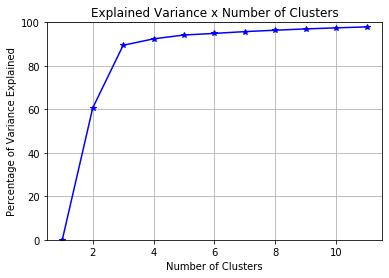

In [22]:
# Elbow Curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, sum_squares_inter_cluster/sum_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Percentage of Variance Explained')
plt.title('Explained Variance x Number of Clusters')

In [23]:
# Creating a model with K = 8
model_v1 = KMeans(n_clusters = 8)
model_v1.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
# Obtaining the minimum and maximum values
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5

# Setting the Meshgrid shape
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Predicting the borders between clusters
Z = model_v1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

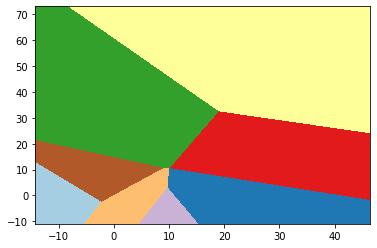

In [25]:
# Plotting the clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

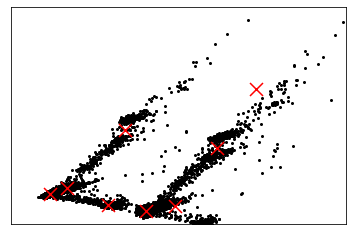

In [26]:
# Plotting centroids
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 4)
centroids = model_v1.cluster_centers_
inert = model_v1.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [27]:
?silhouette_score

In [28]:
# Silhouette Score
labels = model_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.6695803787820922

In [29]:
# Creating a model with K= 10
model_v2 = KMeans(n_clusters = 10)
model_v2.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
# Obtaining the minimum and maximum values
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5

# Setting the Meshgrid shape
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Predicting the borders between clusters
Z = model_v2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

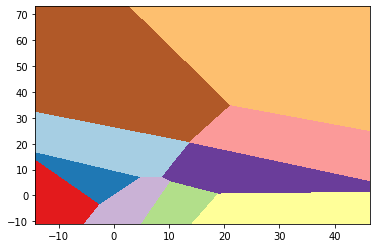

In [31]:
# Plotting the clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

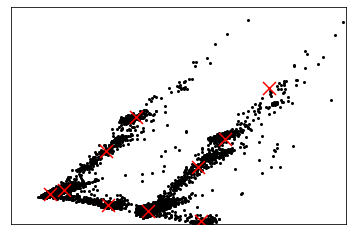

In [32]:
# Plotting centroids
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 4)
centroids = model_v2.cluster_centers_
inert = model_v2.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [33]:
# Silhouette Score
labels = model_v2.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.6503585618334032

In [34]:
# Listing column names
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [35]:
# Create cluster map
cluster_map = pd.DataFrame(sample1, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = model_v1.labels_

In [36]:
cluster_map

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,0.402,0.056,250.110,1.800,0.000,0.000,0,0
1,0.330,0.048,244.110,1.400,0.000,0.000,1,0
2,0.520,0.068,240.240,2.400,0.000,0.000,0,0
3,0.138,0.000,245.160,0.600,0.000,0.000,1,0
4,1.314,0.050,246.610,5.200,0.000,0.000,0,0
...,...,...,...,...,...,...,...,...
20487,0.330,0.098,244.010,1.400,0.000,1.000,1,0
20488,3.030,0.000,240.710,12.600,0.000,0.000,18,5
20489,0.874,0.224,241.850,3.600,2.000,0.000,1,7
20490,2.680,0.098,240.780,11.000,0.000,0.000,17,5


In [37]:
# Calculating the mean energy consumption per cluster
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    0.382352
1    3.075311
2    3.058818
3    4.231940
4    1.095233
5    1.677522
6    6.041717
7    1.645333
Name: Global_active_power, dtype: float64

### That's All Folks!